# Data Anaysis Section
---
This section is for "Nice to Have" purpose for 2023-StateFarm-CodingCompetition. <br>
The purpose of this documentation is to find insight from given dataset and scrutinize it.

## Preparation

In [28]:
## Import libraries
from simple_data_tool import SimpleDataTool

# For Data Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load
Import JSON dataset into DataFrame in order to work with Python Packages

In [29]:
# Load Agent JSON data
agents = pd.read_json("data/sfcc_2023_agents.json")
agents.set_index('id', inplace=True) # Set the 'id' column as the index
df_agents = pd.json_normalize(agents.to_dict(orient='records')) # Normalize the columns

# Load Claim JSON data
claims = pd.read_json("data/sfcc_2023_claims.json")
claims.set_index('id', inplace=True) # Set the 'id' column as the index
df_claims = pd.json_normalize(claims.to_dict(orient='records')) # Normalize the columns

# Load Claim Handler JSON data
claim_handlers = pd.read_json("data/sfcc_2023_claim_handlers.json")
claim_handlers.set_index('id', inplace=True) # Set the 'id' column as the index
df_claim_handlers = pd.json_normalize(claim_handlers.to_dict(orient='records')) # Normalize the columns

# Load Disaster JSON data
disasters = pd.read_json("data/sfcc_2023_disasters.json")
disasters.set_index('id', inplace=True) # Set the 'id' column as the index
df_disasters = pd.json_normalize(disasters.to_dict(orient='records')) # Normalize the columns

### Check the info for each individual dataset

In [30]:
agents.count() # count the number of each columns and missing values.

first_name            100
last_name             100
state                 100
region                100
primary_language      100
secondary_language     59
years_active          100
dtype: int64

In [31]:
agents.head()

,first_name,last_name,state,region,primary_language,secondary_language,years_active
id,,,,,,,
1,Catha,Abrahmer,Minnesota,Midwest,English,German,10
2,Yetta,Eason,Oregon,West,English,Korean,12
3,Janeta,D'Avaux,Connecticut,Northeast,English,None,47
4,Kalie,Tomkins,Virginia,South,English,None,33
5,Teddy,Dennitts,Illinois,Midwest,English,Chinese,48


In [32]:
claims.count() # count the number of each columns and missing values.

disaster_id                  1000
status                       1000
total_loss                   1000
loss_of_life                 1000
type                         1000
severity_rating              1000
estimate_cost                1000
agent_assigned_id            1000
claim_handler_assigned_id    1000
dtype: int64

In [33]:
claims.head()

,disaster_id,status,total_loss,loss_of_life,type,severity_rating,estimate_cost,agent_assigned_id,claim_handler_assigned_id
id,,,,,,,,,
1,15,Received,False,False,Auto,4,3580.02,97,50
2,24,In Review,False,False,Auto,6,1741.32,36,92
3,31,Received,True,False,Auto,4,15224.30,94,133
4,14,Received,False,True,Auto,8,6542.46,92,39
5,30,Closed,False,False,Auto,1,979.81,86,103


In [34]:
claim_handlers.count() # count the number of each columns and missing values.

first_name    156
last_name     156
dtype: int64

In [35]:
claim_handlers.head()

,first_name,last_name
id,,
1,Barnabe,Clynman
2,Valdemar,Size
3,Edithe,Bleakley
4,Sonja,Diamant
5,Elsey,Sreenan


In [36]:
disasters.count() # count the number of each columns and missing values.

type             100
state            100
name             100
description      100
start_date       100
end_date         100
declared_date    100
lat              100
long             100
radius_miles     100
dtype: int64

In [37]:
disasters.head()

,type,state,name,description,start_date,end_date,declared_date,lat,long,radius_miles
id,,,,,,,,,,
1,Flood,Alaska,Alaska Flood,Fusce consequat. Nulla nisl. Nunc nisl.\n\nDui...,2023-06-13,2023-06-20,2023-06-17,58.3271,-134.4742,168
2,Wildfire,Texas,Texas Wildfire,Duis consequat dui nec nisi volutpat eleifend....,2023-04-11,2023-04-19,2023-04-12,33.5693,-101.8904,235
3,Tornado,Virginia,Virginia Tornado,Nullam sit amet turpis elementum ligula vehicu...,2023-04-29,2023-05-07,2023-05-06,38.9776,-77.3860,273
4,Earthquake,Connecticut,Connecticut Earthquake,Fusce consequat. Nulla nisl. Nunc nisl.,2023-04-24,2023-05-09,2023-04-28,41.3657,-72.9275,120
5,Winter Storm,Missouri,Missouri Winter Storm,Suspendisse potenti. In eleifend quam a odio. ...,2023-03-11,2023-03-21,2023-03-14,39.0663,-94.5674,155


---

### Find some insight from the dataset

In [38]:
# Create a SimpleDataTool object for use calculation functions inside the class
data = SimpleDataTool()

##### Find Regional Disaster Counts #####

In [39]:
# Get the total number of disaster occurrend in the simulation
regional_disaster_map = data.get_regional_disaster_map()

In [40]:
# Initialize lists to store the data
disaster_regions = []
disaster_types = []
disaster_counts = []

# Populate the lists with data
for region, disasters in regional_disaster_map.items():
    for disaster_type, count in disasters.items():
        disaster_regions.append(region)
        disaster_types.append(disaster_type)
        disaster_counts.append(count)

# Create a DataFrame
disaster_map = pd.DataFrame({
    'Region': disaster_regions,
    'Disaster Type': disaster_types,
    'Count': disaster_counts
})

# Print the sum of the disaster regionally.
print(disaster_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False))

           Count
Region          
south         36
midwest       25
northeast     20
west          19


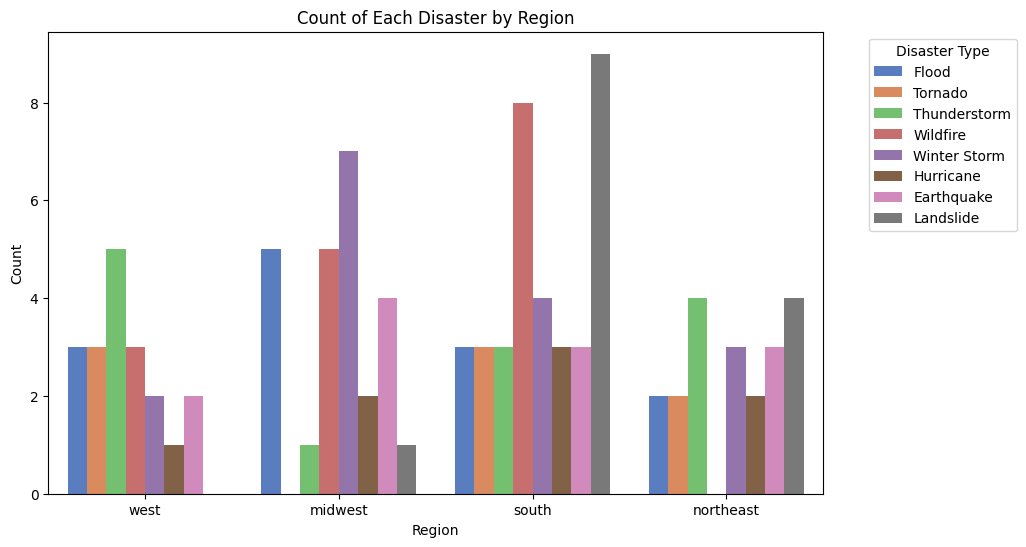

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', hue='Disaster Type', data=disaster_map, errorbar=None, palette='muted')
plt.title('Count of Each Disaster by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Find the number of claims by region #####

In [42]:
regional_claim_map = data.get_total_claims_per_regional_disaster()

In [45]:
# Initialize lists to store the data
claim_map_regions = []
claim_map_state = []
claim_map_counts = []

# Populate the lists with data
for region, state in regional_claim_map.items():
    for state_name, count in state.items():
        claim_map_regions.append(region)
        claim_map_state.append(state_name)
        claim_map_counts.append(count)

# Create a DataFrame
claim_map = pd.DataFrame({
    'Region': claim_map_regions,
    'Disaster Type': claim_map_state,
    'Count': claim_map_counts
})


# Print the sum of the disaster regionally.
total_claim_map = claim_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False)
print(total_claim_map)

           Count
Region          
south        328
midwest      240
west         224
northeast    208


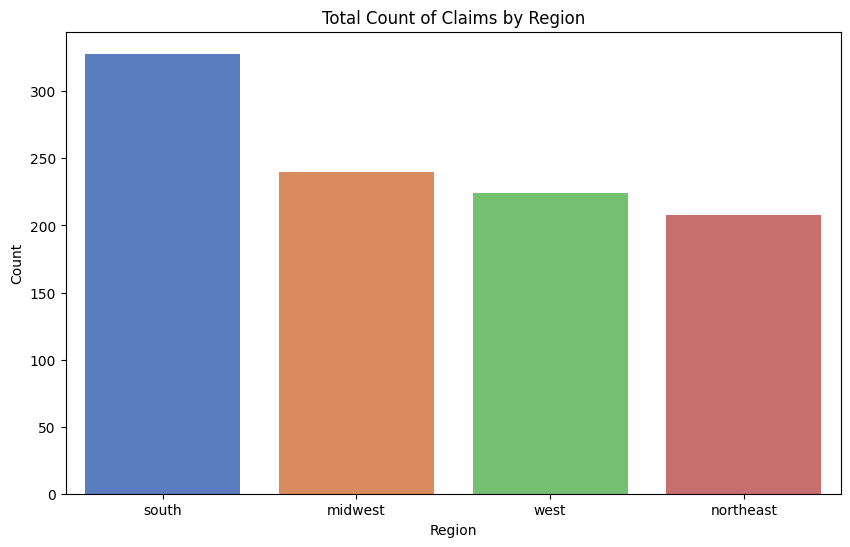

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', data=total_claim_map, legend=False, palette='muted', hue='Region')

plt.title('Total Count of Claims by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.show()